<a href="https://colab.research.google.com/github/chiardy90/House-price-forecast-data-set/blob/main/%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC%E8%B3%87%E6%96%99%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using SVR to implement a house price forecast data set.**

# Step 1: Go to [kaggle.com](https://www.kaggle.com/datasets/shree1992/housedata) to download the data set "House price prediction".


In [ ]:
import pandas as pd

Dataset = pd.read_csv("data.csv")
Dataset.head()

# Step 2: Data Visualization and Feature Engineering.
*   Handling missing values
*   Simple feature engineering after visualization

In [ ]:
# Check field for NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位 {col} 的缺失值共有 {Dataset[col].isnull().sum()} 筆")

第1個欄位 date 的缺失值共有 0 筆
第2個欄位 price 的缺失值共有 0 筆
第3個欄位 bedrooms 的缺失值共有 0 筆
第4個欄位 bathrooms 的缺失值共有 0 筆
第5個欄位 sqft_living 的缺失值共有 0 筆
第6個欄位 sqft_lot 的缺失值共有 0 筆
第7個欄位 floors 的缺失值共有 0 筆
第8個欄位 waterfront 的缺失值共有 0 筆
第9個欄位 view 的缺失值共有 0 筆
第10個欄位 condition 的缺失值共有 0 筆
第11個欄位 sqft_above 的缺失值共有 0 筆
第12個欄位 sqft_basement 的缺失值共有 0 筆
第13個欄位 yr_built 的缺失值共有 0 筆
第14個欄位 yr_renovated 的缺失值共有 0 筆
第15個欄位 street 的缺失值共有 0 筆
第16個欄位 city 的缺失值共有 0 筆
第17個欄位 statezip 的缺失值共有 0 筆
第18個欄位 country 的缺失值共有 0 筆


1st field

In [ ]:
# Understanding Data Distribution
print(Dataset["date"])

#for each_date in Dataset["date"]:
#  print(each_date)

0       2014-05-02 00:00:00
1       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4600, dtype: object


In [ ]:
# Perform feature engineering to map raw data(mapping)
mapping_rule = {"05": "Time_A", "06": "Time_B", "07": "Time_C"}
Dataset["date"] = Dataset.apply(lambda row: mapping_rule[row["date"].split("-")[1]], axis=1)

# Know the number of dates that belong to Time_A, Time_B, Time_C
print(Dataset["date"].value_counts())

Dataset.head()

Time_B    2179
Time_A    1768
Time_C     653
Name: date, dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


2nd field(price)

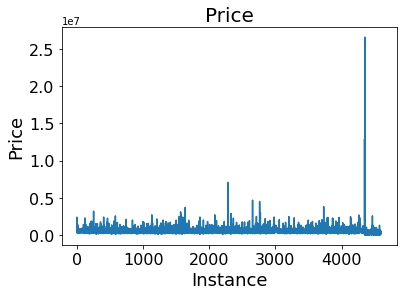

In [ ]:
# Visualization with matplotlib
import matplotlib.pyplot as plt

plt.plot(Dataset["price"])
plt.title("Price", fontsize=20)
plt.xlabel("Instance", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Observe that the number 0.5 * 10^7 may be considered as the critical value of the outlier

In [ ]:
# Tag data belonging to Outlier 
Dataset["Outlier"] = Dataset.apply(lambda row: True if row["price"] > 0.5e7 else False, axis=1)
print(Dataset["Outlier"].value_counts())

Dataset.head()

False    4597
True        3
Name: Outlier, dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,False
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,False
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False


In [ ]:
# Check if there is a case where price is equal to 0
(Dataset["price"] == 0).sum()

# The house price shouldn't be 0, so this is also marked as Outlier
Dataset["Outlier"] = Dataset.apply(lambda row: True if row["price"] == 0 else row["Outlier"], axis=1)
print(Dataset["Outlier"].value_counts())

False    4548
True       52
Name: Outlier, dtype: int64


In [ ]:
# Drop the data belonging to Outlier
Undropped_Data = (Dataset["Outlier"] == False)
Dataset = Dataset[Undropped_Data]
Dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier
0,Time_A,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
1,Time_A,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,False
2,Time_A,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,Time_A,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,False
4,Time_A,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False


3rd field (bedrooms)

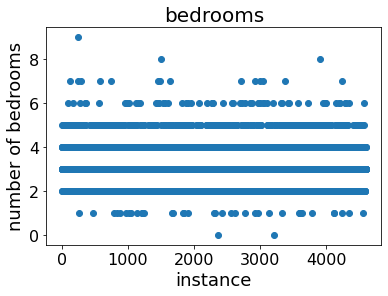

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["bedrooms"], "o")
plt.title("bedrooms", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of bedrooms", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

4th field (bathrooms)

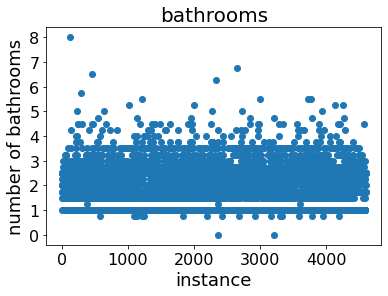

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["bathrooms"], "o")
plt.title("bathrooms", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of bathrooms", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

5th field (sqft_living)

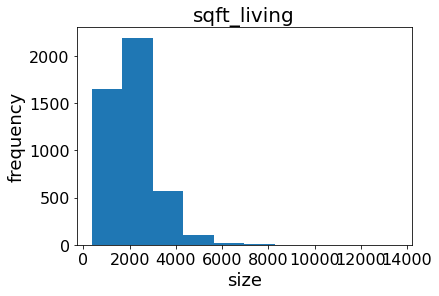

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["sqft_living"])
plt.title("sqft_living", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

6th field (sqft_lot)

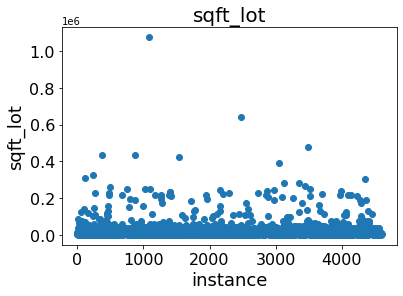

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["sqft_lot"], "o")
#plt.hist(Dataset["sqft_lot"],)
plt.title("sqft_lot", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("sqft_lot", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

7th field (floors)

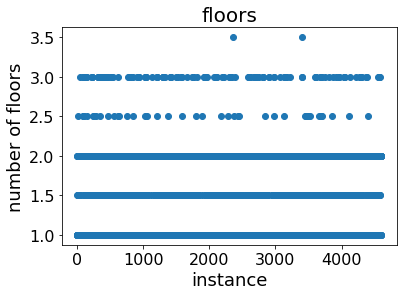

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["floors"], "o")
plt.title("floors", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of floors", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

8th field (waterfront)

In [ ]:
Dataset["waterfront"].value_counts()

0    4519
1      29
Name: waterfront, dtype: int64

9th field (view)

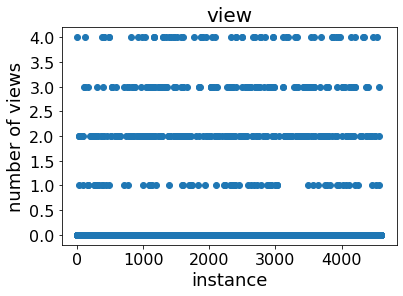

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["view"], "o")
plt.title("view", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("number of views", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

10th field (condition)

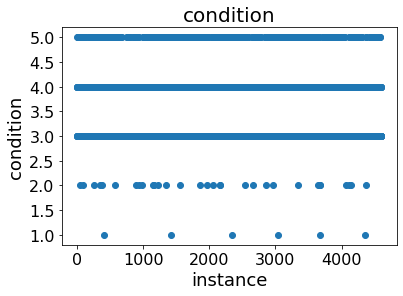

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Dataset["condition"], "o")
plt.title("condition", fontsize=20)
plt.xlabel("instance", fontsize=18)
plt.ylabel("condition", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

11th field (sqft_above)

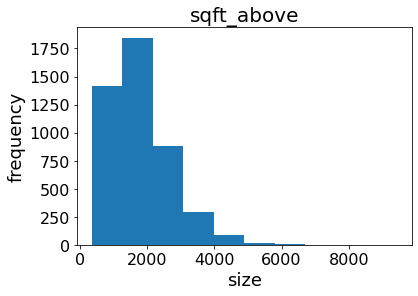

In [ ]:
import matplotlib.pyplot as plt

#plt.plot(Dataset["sqft_above"], "o")
plt.hist(Dataset["sqft_above"])
plt.title("sqft_above", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

12th field (sqft_basement)

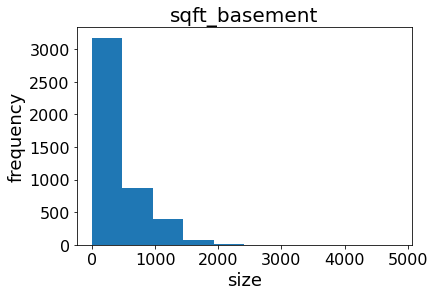

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["sqft_basement"])
plt.title("sqft_basement", fontsize=20)
plt.xlabel("size", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

13th field (yr_built)

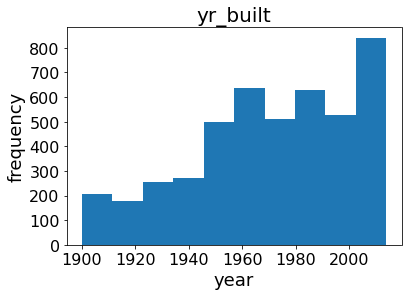

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["yr_built"])
plt.title("yr_built", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

14th field (yr_renovated)

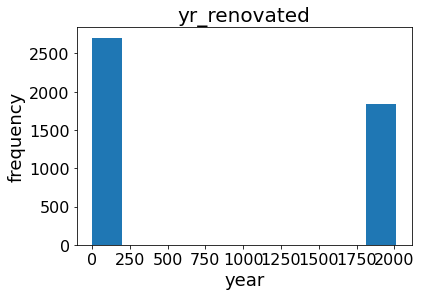

0       2705
2000     169
2003     150
2009     107
2001     104
2005      94
2004      77
2014      72
2006      66
2013      61
1994      57
1923      55
1989      55
2011      54
2008      45
2012      45
1988      43
1983      40
2002      40
1998      39
1993      39
1999      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1982      22
1996      21
1972      17
1990      16
1956      15
1963      12
1969      11
1984       9
1968       9
1970       9
1954       8
1945       7
2007       7
1974       6
1934       6
1986       5
1958       5
1971       5
1978       3
1995       2
1955       2
1980       2
1913       1
1991       1
1948       1
1953       1
1960       1
1987       1
1966       1
1981       1
1977       1
Name: yr_renovated, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

plt.hist(Dataset["yr_renovated"])
plt.title("yr_renovated", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Clarify why there is data near 0 on the left.
print(Dataset["yr_renovated"].value_counts())

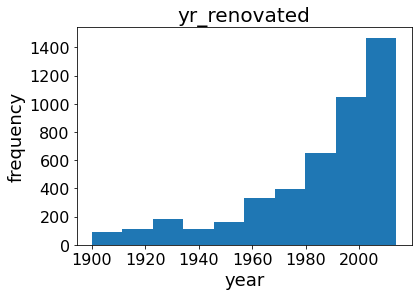

In [ ]:
# Found some yr_renovated to be 0, meaning none of them have been refurbished, however they should be "yr_built".
Dataset["yr_renovated"] = Dataset.apply(lambda row: row["yr_built"] if row["yr_renovated"] == 0 else row["yr_renovated"], axis=1)

import matplotlib.pyplot as plt

plt.hist(Dataset["yr_renovated"])
plt.title("yr_renovated", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("frequency", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

15th field (street)

In [ ]:
#The number of streets is very large, so chose to drop it out.
print(len(Dataset.street.unique()))
Dataset = Dataset.drop(["street"], axis=1)

4473


16th field (city)

In [ ]:
Dataset["city"].value_counts()

Seattle                1560
Renton                  291
Bellevue                280
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    183
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

17th field (statezip)

In [ ]:
Dataset["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    129
WA 98006    109
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

18th field (country)

In [ ]:
Dataset["country"].value_counts()

# Everyone is USA, so drop it
# Drop the Outlier field here.
Dataset = Dataset.drop(["country", "Outlier"], axis=1)

# Step 3: Identify Numerical and Categorical Features

In [ ]:
numerical_attributes = []
categorical_attributes = []

for attr in Dataset.columns:
  #print(Dataset[attr].dtypes)

  attr_type = Dataset[attr].dtypes
  if attr_type == "float64" or attr_type == "int64":
    numerical_attributes.append(attr)
  elif attr_type == "object":
    categorical_attributes.append(attr)

# We will do feautre scaling for X later, so remove Y first.
numerical_attributes.remove("price")

print(f"數值型的 Attributes 有: {numerical_attributes}")
print(f"類別型的 Attributes 有: {categorical_attributes}")

數值型的 Attributes 有: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
類別型的 Attributes 有: ['date', 'city', 'statezip']


# Step 4 : Perform One-Hot Encoding

In [ ]:
# Using pandas' get_dummies, can quickly One-Hot Encoding the fields in the Dataset that belong to the category

print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")
One_Hot_Dataset.head()

One-Hot Encoding 前有 16 個欄位
One-Hot Encoding 後有 137 個欄位


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Perform data segmentation

In [ ]:
from sklearn.model_selection import train_test_split

Y = One_Hot_Dataset["price"]
X = One_Hot_Dataset.drop(["price"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3638, 136)
(3638,)
(910, 136)
(910,)


# Step 6: Perform Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Get the numerical data of Training Dataset and Testing Dataset.
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

# Use only the training dataset to find the mapping rule.
# Because when training or Feature Scaling, only existing data can be used, and the test data set is regarded as future data.
x_scaler = MinMaxScaler().fit(X_train_numerical)

# Use scaler to transform the numerical data of the training and testing datasets.
X_train_numerical_trans = x_scaler.transform(X_train_numerical)
X_test_numerical_trans = x_scaler.transform(X_test_numerical)

# Overwrite the data of the numerical field, the old data range is different, and the contribution of each field is different during training.
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

# Do Feature Scaling for Y, because in the SVM model line graph, 
# the distance between each point and the line must be within 1, 
# but the original Y range is too large.
y_scaler = StandardScaler().fit(Y_train.to_numpy().reshape(-1,1)) # function requires 2D
Y_train_trans = y_scaler.transform(Y_train.to_numpy().reshape(-1,1))
Y_test_trans = y_scaler.transform(Y_test.to_numpy().reshape(-1,1))

# Step 7: Fit the support vector regression model

In [ ]:
from sklearn.svm import SVR

# Train a Polynomial Regression Model
# parameter
# kernel: "rbf", "sigmoid", "polynomial"
# c: ... 0.01, 0.1, 1, 10, 100, ...
# gamma: ..., 0.01, 0.1, 1, 10, 100, ...
# degree: # This parameter needs to be set when using polynomial kernal
# 
#SVR_Algorithm = SVR(kernel="poly", C=10, gamma=0.1, degree=3)
SVR_Algorithm = SVR(kernel="rbf", C=10, gamma=0.1)
SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1)) # function requires 2D

# Step 8: Predict and evaluate

In [ ]:
# Make predictions using the trained support vector regression model (on validation dataset).
SVR_Predictions = SVR_Model.predict(X_test)

# Remember to do an inverse transform on the predicted values.
SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
Y_test_inv = y_scaler.inverse_transform(Y_test_trans)

Total_Error=0
# Print out predictions and correct answers.
counter = 0
for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test_inv.reshape(-1)):
  if counter < 50:
    print(f"第{counter}筆預測結果: {round(pred)} vs. 實際答案: {round(ans)}")

  # Pick out particularly unreasonable forecasts.
  if abs(pred-ans) > 1e10:
    print(f"第{counter}筆預測值較為異常{round(pred)}，而答案為{round(ans)}")
  else:
    Total_Error = Total_Error + (abs(pred-ans))
  counter = counter + 1
    
print(f"\n平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

第0筆預測結果: 609505 vs. 實際答案: 570000
第1筆預測結果: 187240 vs. 實際答案: 215000
第2筆預測結果: 335063 vs. 實際答案: 300000
第3筆預測結果: 276033 vs. 實際答案: 219950
第4筆預測結果: 345095 vs. 實際答案: 290000
第5筆預測結果: 597836 vs. 實際答案: 579000
第6筆預測結果: 1730914 vs. 實際答案: 2700000
第7筆預測結果: 595426 vs. 實際答案: 660000
第8筆預測結果: 230841 vs. 實際答案: 190000
第9筆預測結果: 842760 vs. 實際答案: 739888
第10筆預測結果: 206302 vs. 實際答案: 230000
第11筆預測結果: 542863 vs. 實際答案: 510000
第12筆預測結果: 321556 vs. 實際答案: 380000
第13筆預測結果: 1261906 vs. 實際答案: 1225000
第14筆預測結果: 344817 vs. 實際答案: 107500
第15筆預測結果: 615737 vs. 實際答案: 657500
第16筆預測結果: 702586 vs. 實際答案: 623000
第17筆預測結果: 500498 vs. 實際答案: 440000
第18筆預測結果: 583417 vs. 實際答案: 560000
第19筆預測結果: 222821 vs. 實際答案: 174500
第20筆預測結果: 493611 vs. 實際答案: 530000
第21筆預測結果: 403229 vs. 實際答案: 315000
第22筆預測結果: 516217 vs. 實際答案: 430000
第23筆預測結果: 321449 vs. 實際答案: 329445
第24筆預測結果: 518639 vs. 實際答案: 551000
第25筆預測結果: 594155 vs. 實際答案: 592500
第26筆預測結果: 293148 vs. 實際答案: 350000
第27筆預測結果: 887614 vs. 實際答案: 890000
第28筆預測結果: 557980 vs. 實際答案: 554000
第29筆預測結果: 253967 vs.

# Step 9: Experiment with different parameter combinations

In [ ]:
def test_SVR_parameter(kernel, C, gamma):
  # Instantiated algorithm
  SVR_Algorithm = SVR(kernel=kernel, C=C, gamma=gamma)

  # Train the model
  SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))

  # Evaluation model
  # Prediction using a trained support vector regression model (on validation dataset).
  SVR_Predictions = SVR_Model.predict(X_test)

  # Remember to do an inverse transform on the predicted values.
  SVR_Predictions_inv = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))
  Y_test_inv = y_scaler.inverse_transform(Y_test_trans)

  Total_Error=0
  # Print out predictions and correct answers.
  counter = 0
  for pred, ans in zip(SVR_Predictions_inv.reshape(-1), Y_test_inv.reshape(-1)):
    # if counter < 50:
    #   print(f"第{counter}筆預測結果: {round(pred)} vs. 實際答案: {round(ans)}")

    # Pick out particularly unreasonable forecasts.
    if abs(pred-ans) > 1e10:
      print(f"第{counter}筆預測值較為異常{round(pred)}，而答案為{round(ans)}")
    else:
      Total_Error = Total_Error + (abs(pred-ans))
    counter = counter + 1
      
  print(f"\n[C={C}, Gamma={gamma}]平均誤差值是 {round(Total_Error/len(SVR_Predictions))}")

In [ ]:
kernel = "rbf"
C_list = [0.01, 0.1, 1, 10, 100]
Gamma_list = [0.01, 0.1, 1, 10, 100]
for C in C_list:
  for Gamma in Gamma_list:
    test_SVR_parameter(kernel, C, Gamma)


[C=0.01, Gamma=0.01]平均誤差值是 233586

[C=0.01, Gamma=0.1]平均誤差值是 198048

[C=0.01, Gamma=1]平均誤差值是 216056

[C=0.01, Gamma=10]平均誤差值是 235185

[C=0.01, Gamma=100]平均誤差值是 240620

[C=0.1, Gamma=0.01]平均誤差值是 182388

[C=0.1, Gamma=0.1]平均誤差值是 124410

[C=0.1, Gamma=1]平均誤差值是 155486

[C=0.1, Gamma=10]平均誤差值是 204217

[C=0.1, Gamma=100]平均誤差值是 234549

[C=1, Gamma=0.01]平均誤差值是 117381

[C=1, Gamma=0.1]平均誤差值是 101231

[C=1, Gamma=1]平均誤差值是 118540

[C=1, Gamma=10]平均誤差值是 170059

[C=1, Gamma=100]平均誤差值是 222718

[C=10, Gamma=0.01]平均誤差值是 103395

[C=10, Gamma=0.1]平均誤差值是 94969

[C=10, Gamma=1]平均誤差值是 119863

[C=10, Gamma=10]平均誤差值是 169304

[C=10, Gamma=100]平均誤差值是 229564

[C=100, Gamma=0.01]平均誤差值是 96630

[C=100, Gamma=0.1]平均誤差值是 104015

[C=100, Gamma=1]平均誤差值是 126883

[C=100, Gamma=10]平均誤差值是 172274

[C=100, Gamma=100]平均誤差值是 230098
